# Analysis of 2015 Top-100 analytics startups

### Load the dataset via URL

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from scipy import stats
startups = pd.read_csv('https://raw.githubusercontent.com/curran/data/gh-pages' + 
                       '/mattermark/2015-top-100-analytics-startups.csv')

### Read data and do basic checks (names, datatypes, etc.)

In [2]:
startups

,Name,Growth Score,Stage,Total Funding,Last Funding,Location
0,Palantir Technologies,330,Late,$1.4B,7/23/2015,Bay Area
1,Domo,1608,Late,$483.7M,4/8/2015,Salt Lake City
2,Mulesoft,1528,Late,$258.5M,5/19/2015,Bay Area
3,Medallia,615,Late,$255.0M,7/21/2015,Bay Area
4,Qualtrics,1544,B,$220.0M,9/24/2014,Salt Lake City
...,...,...,...,...,...,...
95,ADENTS HTI,95,A,$13.0M,6/9/2015,Palaiseau
96,JethroData,92,B,$12.6M,6/9/2015,Netanya
97,GridGain Systems,109,B,$12.5M,7/29/2013,Bay Area
98,Cask,190,A,$12.5M,11/14/2012,Bay Area


In [3]:
startups.columns = ['name', 'growth_score', 'funding_stage', 't_funding', 'date_l_funding', 'location'] #Change column names into what are easy to type 
startups.head(1)

,name,growth_score,funding_stage,t_funding,date_l_funding,location
0,Palantir Technologies,330,Late,$1.4B,7/23/2015,Bay Area


In [4]:
startups.dtypes

name              object
growth_score       int64
funding_stage     object
t_funding         object
date_l_funding    object
location          object
dtype: object

### Change datatype

In [5]:
'''
Two columns, i.e., t_funding and date_l_funding, are unprocessable mathmatically.
We change them into numeric and datetime type.
'''
#startups.dtypes.value_counts()

import datetime
startups.loc[:,'date_l_funding'] = pd.to_datetime(startups['date_l_funding']) #Change values of 'date_l_funding' to datetime dtype 
startups['year_l_funding'] = pd.DatetimeIndex(startups['date_l_funding']).year #Creat a new column, i.e., 'year_l_funding' to show the year of last funding.
startups['year_l_funding'] = startups['year_l_funding'].apply(str)
startups

,name,growth_score,funding_stage,t_funding,date_l_funding,location,year_l_funding
0,Palantir Technologies,330,Late,$1.4B,2015-07-23,Bay Area,2015
1,Domo,1608,Late,$483.7M,2015-04-08,Salt Lake City,2015
2,Mulesoft,1528,Late,$258.5M,2015-05-19,Bay Area,2015
3,Medallia,615,Late,$255.0M,2015-07-21,Bay Area,2015
4,Qualtrics,1544,B,$220.0M,2014-09-24,Salt Lake City,2014
...,...,...,...,...,...,...,...
95,ADENTS HTI,95,A,$13.0M,2015-06-09,Palaiseau,2015
96,JethroData,92,B,$12.6M,2015-06-09,Netanya,2015
97,GridGain Systems,109,B,$12.5M,2013-07-29,Bay Area,2013
98,Cask,190,A,$12.5M,2012-11-14,Bay Area,2012


In [6]:
'''
Change 't_funding' to numeric dtype.
'''

pd.set_option('precision', 2)
t_funding = []
for funding in startups.loc[:, 't_funding']:
    funding = funding[1:]
    if funding[-1] == 'M':
        funding = float(funding[:-1])
    else:
        funding = float(funding[:-1])*1000
    t_funding.append(funding)
startups.t_funding = pd.Series(t_funding)
startups = startups.rename(columns = {'t_funding':'t_funding(million_USD)'}) #As we changed the unit of 't_funding' when changing its dtype, we label it in the column name.
startups.dtypes

name                              object
growth_score                       int64
funding_stage                     object
t_funding(million_USD)           float64
date_l_funding            datetime64[ns]
location                          object
year_l_funding                    object
dtype: object

### Check missing values

In [7]:
def check_missing_v (col):
    '''
    Return the count of records excluding missing values of each column.
    @param col the given column.
    @return the count of records.
    '''
    return len(col) - len(pd.notnull(col))

In [8]:
print(f'Count of growth_score missing values:           {check_missing_v(startups.growth_score)}')
print(f'Count of funding_stage missing values:          {check_missing_v(startups.funding_stage)}')
print(f'Count of t_funding(million_USD) missing values: {check_missing_v(startups["t_funding(million_USD)"])}')
print(f'Count of date_l_funding missing values:         {check_missing_v(startups.date_l_funding)}')
print(f'Count of location missing values:               {check_missing_v(startups.location)}')
print(f'Count of year_l_funding missing values:         {check_missing_v(startups.year_l_funding)}')

Count of growth_score missing values:           0
Count of funding_stage missing values:          0
Count of t_funding(million_USD) missing values: 0
Count of date_l_funding missing values:         0
Count of location missing values:               0
Count of year_l_funding missing values:         0


### Descriptive statistics

In [9]:
startups.describe()

,growth_score,t_funding(million_USD)
count,100.00,100.00
mean,418.90,70.13
std,532.90,149.69
min,-171.00,12.30
25%,117.00,20.00
50%,301.00,35.95
75%,486.75,63.63
max,3126.00,1400.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1984ee90>,
      dtype=object)

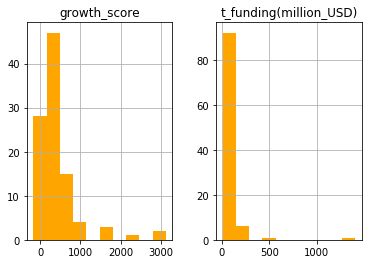

In [10]:
startups.hist(color = 'orange')

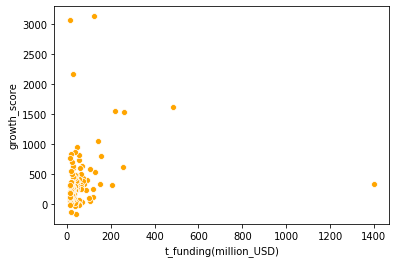

In [11]:
 scatter = sns.scatterplot(x = startups.loc[:, 't_funding(million_USD)'], y = startups.growth_score, color = 'orange')

In [12]:
sub_startups = startups[(startups['growth_score'] < 1500) & (startups['t_funding(million_USD)'] < 500)]
sub_startups.describe()

,growth_score,t_funding(million_USD)
count,93.00,93.00
mean,306.76,48.21
std,248.46,42.80
min,-171.00,12.30
25%,109.00,20.00
50%,280.00,35.00
75%,437.00,54.70
max,1049.00,255.00


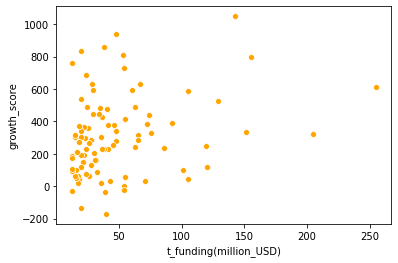

In [13]:
scatter = sns.scatterplot(x = sub_startups.loc[:, 't_funding(million_USD)'], y = sub_startups.growth_score, color = 'orange')

#### Count of startups in different funding stages, locations and the years in which they received their last funding

In [14]:
# Reference: https://stackoverflow.com/questions/18425225/getting-the-name-of-a-variable-as-a-string.

import inspect
def retrieve_name(var):
        
        '''
        Gets the name of var. Does it from the out most frame inner-wards.
        @param var: variable to get name from.
        @return: string
        '''
        
        for fi in reversed(inspect.stack()):
            names = [var_name for var_name, var_val in fi.frame.f_locals.items() if var_val is var]
            if len(names) > 0:
                return names[0]

In [15]:
def cat_describe (col):
    
    '''
    Return a bar chart of the count of startups in each value of a given categorical column.
    @param col: given columns that is categorical datatype.
    @return: a list and a bar chart.
    '''
    values, counts = np.unique(col, return_counts = True)
    sns.set_style('darkgrid')
    sns.set(rc={'figure.figsize':(10,5)})
    barchart = sns.barplot(x = values, y = counts, color = 'orange')
    var_name = retrieve_name(col)
    barchart.set(title = f'Count of startups in each {var_name}',
                 xlabel = f'{var_name.capitalize()}', ylabel = 'Count')
    barchart.set_xticklabels(barchart.get_xticklabels(), rotation=45)

#     Scale the y-axis by 10% to make room for text above the bars.
    barchart.set_ylim(top=1.10*max(counts))
    
#     Display the count above each patch (bar).
    for bar, count in zip(barchart.patches, counts):
        text_x = bar.get_x() + bar.get_width()/2  
        text_y = bar.get_height() 
        text   = f'{count}'
        barchart.text(text_x, text_y, text, 
              fontsize=11, ha='center', va='bottom')
    listz = list(zip(values, counts))
    print(f'{var_name}:',listz)
    print()
    return

funding_stage: [('A', 5), ('B', 40), ('C', 23), ('Late', 32)]



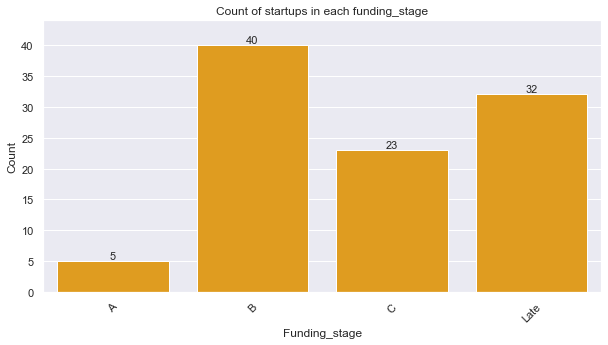

In [16]:
funding_stage = startups.funding_stage
cat_describe(funding_stage)

location: [('Austin', 2), ('Baltimore', 1), ('Bangalore', 1), ('Bay Area', 49), ('Boston', 10), ('Brighton', 1), ('Burnaby', 1), ('Cambridge', 1), ('Dallas', 1), ('Fort Myers', 1), ('Hartford', 1), ('London', 1), ('Los Angeles', 3), ('Netanya', 1), ('New York', 11), ('Palaiseau', 1), ('Philadelphia', 3), ('Ramat HaSharon', 1), ('Salt Lake City', 4), ('Seattle', 3), ('Toronto', 1), ('Vancouver', 1), ('Washington D.C.', 1)]



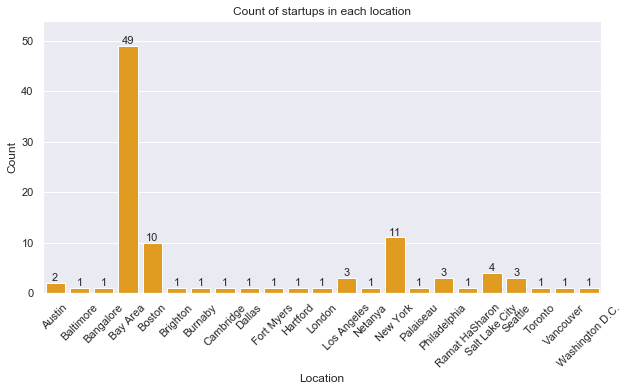

In [17]:
location = startups.location
cat_describe(location)

year_l_funding: [('2006', 1), ('2008', 1), ('2009', 1), ('2010', 1), ('2011', 3), ('2012', 6), ('2013', 12), ('2014', 33), ('2015', 42)]



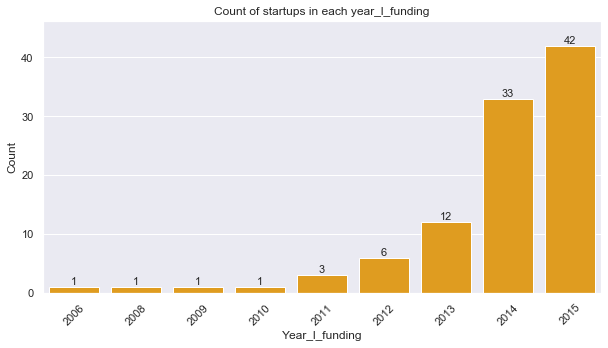

In [18]:
year_l_funding = startups.year_l_funding
cat_describe(year_l_funding)

### Central tendency

In [19]:
def centr_tend(col):
    
    '''
    Return mean, median and mode of a given colunm.
    @param col: a given colunm of Startups.
    @return two floating numbers and two arrays. 
    '''
    
    var_name = retrieve_name(col) #Call the function of retrieve_name to get the parameter name.
    print(f'Mean of {var_name}     = {np.mean(col):.2f}')
    print(f'Median of {var_name}   = {np.median(col):.2f}')
    print(f'Mode of {var_name}     = {stats.mode(col)}')
    return

In [20]:
print()
growth_score = startups.growth_score
centr_tend(growth_score)
print()


Mean of growth_score     = 418.90
Median of growth_score   = 301.00
Mode of growth_score     = ModeResult(mode=array([304]), count=array([3]))



In [21]:
print()
t_funding = startups.loc[:,'t_funding(million_USD)']
centr_tend(t_funding)


Mean of t_funding     = 70.13
Median of t_funding   = 35.95
Mode of t_funding     = ModeResult(mode=array([20.]), count=array([6]))


### Variability

In [22]:
def variability(col):
    '''
    Return range, IQR, variance and std of a given column.
    @param col: a given column of Startups.
    @return floating numbers.
    '''
    
    import statistics
    var_name = retrieve_name(col) #Call the function of retrieve_name to get the parameter name.
    col_max = np.amax(col)
    col_min = np.amin(col)
    print(f'Rang of {var_name}                 = {col_max - col_min:.2f}')
    print(f'Interquartile range of {var_name}   = {stats.iqr(col):.2f}')
    print(f'Variance of {var_name}             = {statistics.pvariance(col):.2f}')
    print(f'Standard deviation of {var_name}   = {statistics.pstdev(col):.2f}')
    return

In [23]:
print()
variability(growth_score)
print()


Rang of growth_score                 = 3297.00
Interquartile range of growth_score   = 369.75
Variance of growth_score             = 281137.33
Standard deviation of growth_score   = 530.22



In [24]:
print()
variability(t_funding)
print()


Rang of t_funding                 = 1387.70
Interquartile range of t_funding   = 43.63
Variance of t_funding             = 22184.26
Standard deviation of t_funding   = 148.94



In [25]:
def boxchart(col, col2 = None):
    '''
    Return box chart of a given column ranges.
    @param col: a given column.
    @param col2: a given column as the group value.
    @return a box chart.
    '''
    
    var_name = retrieve_name(col) #Call the function of retrieve_name to get the parameter name.
    sns.set_style('whitegrid')
    sns.set(rc={'figure.figsize':(6,5)})
    boxplot = sns.boxplot(y = col, x = col2, data = startups)
    boxplot.set(title = f'Box Chart of {var_name.capitalize()} Ranges')

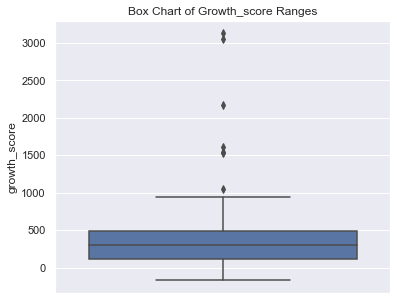

In [26]:
boxchart(growth_score)

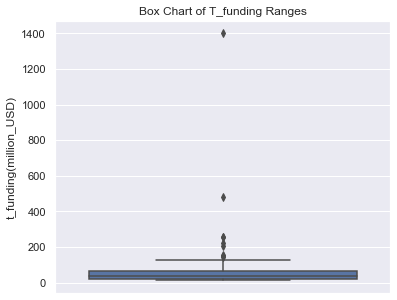

In [27]:
boxchart(t_funding)

### Analysis under different scenarios

#### 1. Total fundings and growth score in each funding stage

In [28]:
def s_t_funding_in_stage(stage):
    
    '''
    Return the total fundings in a given stage.
    @param stage: the given stage
    @return floating numbers.
    '''
    
    return sum([value for value, fstage in zip(t_funding, funding_stage) if fstage == stage])

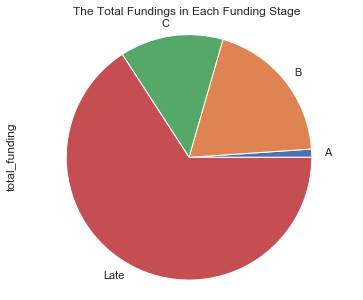

The total fundings in stage_late: 4617.50 millon USD which is 65%
The total fundings in stage_A:    75.20 millon USD which is 1%
The total fundings in stage_B:    1365.20 millon USD which is 65%
The total fundings in stage_C:    954.90 millon USD which is 13%



In [29]:
print()
t_funding_late = s_t_funding_in_stage('Late')
t_funding_a = s_t_funding_in_stage('A')
t_funding_b = s_t_funding_in_stage('B')
t_funding_c = s_t_funding_in_stage('C')

# Calculate the percentage of totoal fundings in each stage
l_t_funding_stage = [t_funding_late, t_funding_a, t_funding_b, t_funding_c]
sum_t_funding = sum(l_t_funding_stage)
pct_t_funding_late = 100 * t_funding_late/sum_t_funding
pct_t_funding_a = 100 * t_funding_a/sum_t_funding
pct_t_funding_b = 100 * t_funding_late/sum_t_funding
pct_t_funding_c = 100 * t_funding_c/sum_t_funding
pcts = [int(pct_t_funding_late), int(pct_t_funding_a), int(pct_t_funding_b), int(pct_t_funding_c)]

# Plot a pie chart of the total funding in each stage
t_funding_stage_pie = pd.DataFrame({'stage' : ['Late', 'A', 'B', 'C'],
                                    'total_funding' : [t_funding_late, t_funding_a, t_funding_b, t_funding_c]})
t_funding_stage_pie.total_funding.groupby(t_funding_stage_pie.stage).sum().plot(title = 'The Total Fundings in Each Funding Stage ', kind='pie')
plt.axis('equal')
plt.show()
print(f'The total fundings in stage_late: {t_funding_late:.2f} millon USD which is {pcts[0]}%')
print(f'The total fundings in stage_A:    {t_funding_a:.2f} millon USD which is {pcts[1]}%')
print(f'The total fundings in stage_B:    {t_funding_b:.2f} millon USD which is {pcts[2]}%')
print(f'The total fundings in stage_C:    {t_funding_c:.2f} millon USD which is {pcts[3]}%')
print()

sub_funding_stage: [('B', 2), ('Late', 8)]



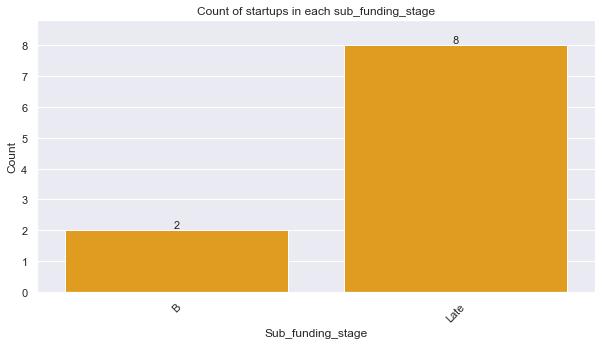

In [30]:
# Plot a bar chart to show the count of top-ten funded startups in each funding stage

sub_t_startups = startups.iloc[:10, :]
sub_funding_stage = sub_t_startups.funding_stage
cat_describe(sub_funding_stage)

sub_g_stage: [('B', 5), ('Late', 5)]



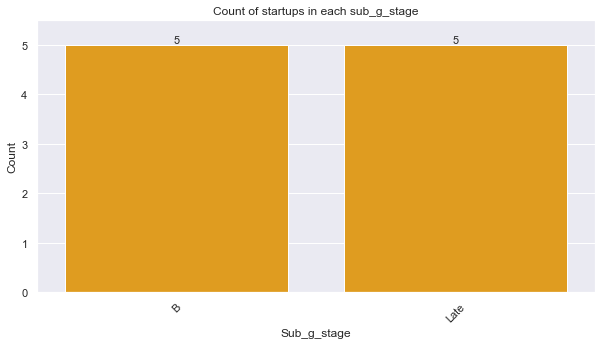

In [31]:
# Plot a bar chart to show the count of startups having top-ten growth score in each funding stage

sort_g_startups = startups.sort_values(by = ['growth_score'], ascending = False)
sub_g_startups = sort_g_startups.iloc[:10, :]
sub_g_stage = sub_g_startups.funding_stage
cat_describe(sub_g_stage)

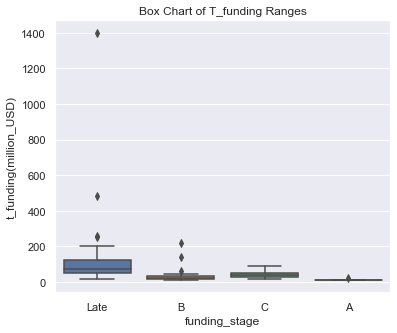

In [32]:
# Plot a box chart of total fundings range within each funding stage via call function 'boxchart()'

boxchart(t_funding, funding_stage) 

#### 2. Total funding inside and outside bay area

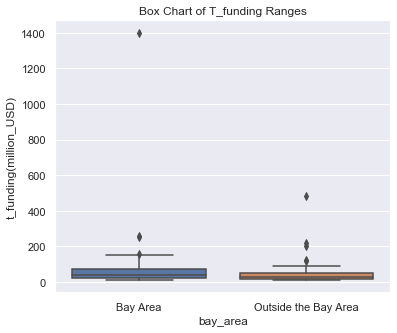

In [33]:
#https://datatofish.com/if-condition-in-pandas-dataframe/
#looked at the above webpage to figure out how to seperate startups located inside and outside of the bay area

startups.loc[startups['location'] == 'Bay Area','bay_area']='Bay Area'
startups.loc[startups['location'] != 'Bay Area','bay_area']= 'Outside the Bay Area'

bay_area = startups.bay_area
boxchart(t_funding, bay_area) 

##### Bay Area vs Outside Bay Area Funding (2015)

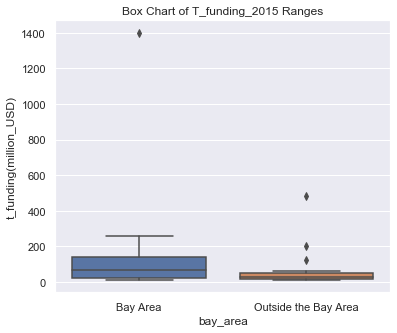

In [34]:
#looking at 2015 data only 

startups_2015 = startups['year_l_funding']=='2015'
startups_2015_all = startups[startups_2015]
t_funding_2015 = startups_2015_all.loc[:, 't_funding(million_USD)']
bay_area_2015 = startups_2015_all.bay_area
boxchart(t_funding_2015, bay_area_2015)

##### Bay Area vs Outside Bay Area Funding (2014)

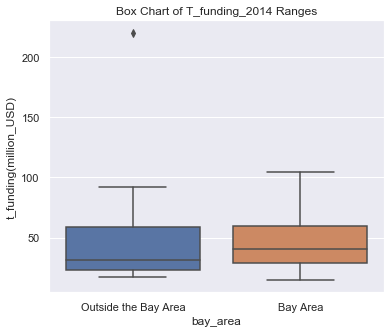

In [35]:
#looking at 2014 data only 

startups_2014 = startups['year_l_funding']=='2014'
startups_2014_all = startups[startups_2014]
t_funding_2014 = startups_2014_all.loc[:, 't_funding(million_USD)']
bay_area_2014 = startups_2014_all.bay_area
boxchart(t_funding_2014, bay_area_2014)

##### Bay Area vs Outside Bay Area Funding (2013)

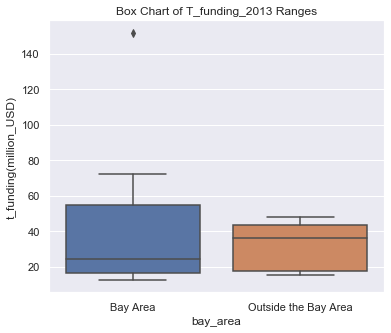

In [36]:
#looking at 2013 data only 

startups_2013 = startups['year_l_funding']=='2013'
startups_2013_all = startups[startups_2013]
t_funding_2013 = startups_2013_all.loc[:, 't_funding(million_USD)']
bay_area_2013 = startups_2013_all.bay_area
boxchart(t_funding_2013, bay_area_2013)

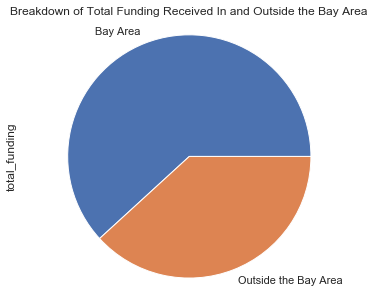

Total Funding Received in the Bay Area 4333.60 million USD which is 61.80%
Total Funding Received Outside the Bay Area 2679.20 million USD which is 38.20%


In [37]:
def funding_in_area(area):
    """ 
    Return the sum of funding for startups in each area category
    @param is the funding stage.
    @return the sum of funding.
    """
    s_t_funding = 0
    for funding,bay_area in zip(t_funding, startups['bay_area']): 
        if bay_area==area:
            s_t_funding += funding
    
    return s_t_funding

# Calculate the percentage of totoal funding inside and outsied the bay area.
bay_funding=funding_in_area('Bay Area')
outside_bay_funding=funding_in_area('Outside the Bay Area')
total_funding = bay_funding + outside_bay_funding
bay_funding_pct = (bay_funding/total_funding)
outside_bay_funding_pct = (outside_bay_funding/total_funding)

# Plot a pie chart of the total funding inside and outside the bay area
funding_pie = pd.DataFrame({'bay_area' : ['Bay Area','Outside the Bay Area'], 
                             'total_funding' : [bay_funding, outside_bay_funding]})
funding_pie.total_funding.groupby(funding_pie.bay_area).sum().plot(kind='pie',title='Breakdown of Total Funding Received In and Outside the Bay Area')
plt.axis('equal')
plt.show()

print(f'Total Funding Received in the Bay Area {bay_funding:.2f} million USD which is {bay_funding_pct:.2%}')
print(f'Total Funding Received Outside the Bay Area {outside_bay_funding:.2f} million USD which is {outside_bay_funding_pct:.2%}')

In [38]:
def show_bar_chart(title, x_labels, y_label, x_values, y_values, bar_topper):
    """
    Display a bar chart.
    @param title the chart title.
    @param x_labels the labels for the x axis
    @param y_label  the label for the y axis
    @param x_values the x values to plot
    @param y_values the y values to plot
    @param bar_text the text above each bar
    """
    
    sns.set_style('darkgrid')  # dark backround with gray grid lines
    axes = sns.barplot(x_values, y_values)
    axes.set_title(title)
    axes.set(xlabel=x_labels, ylabel=y_label)
    

    # Scale the y-axis by 10% to make room for text above the bars.
    axes.set_ylim(top=1.10*max(y_values))

    # Display the percentage above each patch (bar).
    for bar, topper in zip(axes.patches, bar_topper):
        text_x = bar.get_x() + bar.get_width() / 2.0  
        text_y = bar.get_height()
        axes.set_xticklabels(axes.get_xticklabels(),rotation=45)
        axes.text(text_x, text_y, topper, 
                  fontsize=11, ha='center', va='bottom')
    plt.show()  # display the chart 

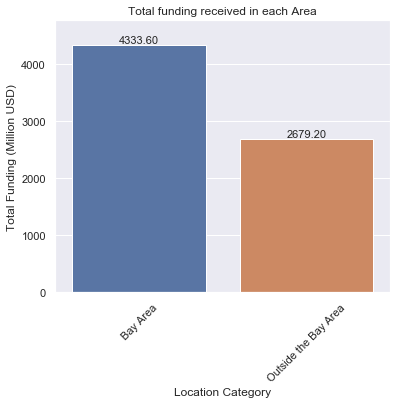

In [39]:
# Plot bar chart of total funding inside and outside the bay area.
area  = ['Bay Area', 'Outside the Bay Area']
fnd     = [bay_funding, outside_bay_funding]
toppers  = [f'{fnd[0]:.2f}', f'{fnd[1]:.2f}']

show_bar_chart('Total funding received in each Area',
               'Location Category', 'Total Funding (Million USD)', 
               area, fnd, toppers)

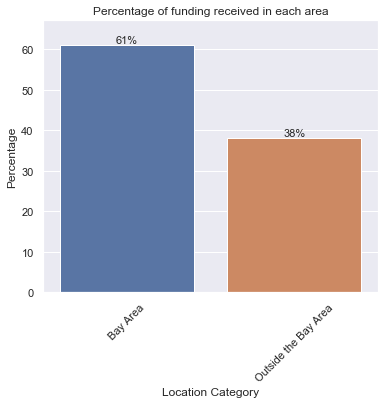

Bay Area Startups: 49
Startups Outside the Bay Area: 51


In [40]:
# Calculate the percentage of totoal fundings inside and outside the bay area.
bay_area_startups = startups[(startups['bay_area'] == 'Bay Area')]
bay_area_startups_count = bay_area_startups['name'].count()
outside_startups = startups[(startups['bay_area'] == 'Outside the Bay Area')]
outside_startups_count = outside_startups['name'].count()

area  = ['Bay Area', 'Outside the Bay Area']
total_funding     = [int(bay_funding_pct*100), int(outside_bay_funding_pct*100)]
toppers  = [f'{total_funding[0]}%', f'{total_funding[1]}%']

show_bar_chart('Percentage of funding received in each area',
               'Location Category', 'Percentage', 
               area, total_funding, toppers)

print(f'Bay Area Startups: {bay_area_startups_count}')
print(f'Startups Outside the Bay Area: {outside_startups_count}')

#### 3. Total fundings in each year when startups recieved their last fundings (2013, 2014, 2015)

In [41]:
'''
Here we choose three cases, i.e., 2013, 2014 and 2015 to analize.

It's because that the bar chart of "Count of startups in each year_l_funding" above shows that 
nearly 90% startups recieved their last fundings in these three years.
'''

def s_t_funding_in_year(year):
    
    '''
    Return the total fundings of the last year in which startups recieved their fundings.
    @param year: the last year in which startups recieved fundings.
    @return floating numbers.
    '''
    
    return sum([funding for funding, lyear in zip(t_funding, year_l_funding) if lyear == year])

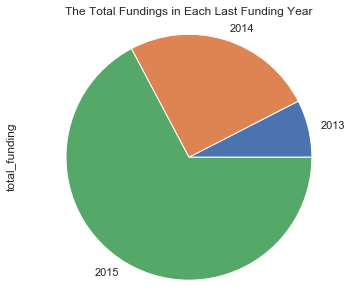

The total fundings in 2015:    4363.70 millon USD which is 67%
The total fundings in 2014:    1635.70 millon USD which is 25%
The total fundings in 2013:    489.90 millon US which is 7%



In [42]:
print()
t_funding_2015 = s_t_funding_in_year('2015')
t_funding_2014 = s_t_funding_in_year('2014')
t_funding_2013 = s_t_funding_in_year('2013')

# Calculate the percentage of totoal fundings in each year
l_t_funding_year = [t_funding_2015, t_funding_2014, t_funding_2013]
sum_t_funding = sum(l_t_funding_year)
pct_t_funding_2015 = 100 * t_funding_2015/sum_t_funding
pct_t_funding_2014 = 100 * t_funding_2014/sum_t_funding
pct_t_funding_2013 = 100 * t_funding_2013/sum_t_funding
pcts_year = [int(pct_t_funding_2015), int(pct_t_funding_2014), int(pct_t_funding_2013)]

# Plot a pie chart of the total funding in each year
t_funding_year_pie = pd.DataFrame({'year' : ['2015', '2014', '2013'],
                                   'total_funding' : [t_funding_2015, t_funding_2014, t_funding_2013]})
t_funding_year_pie.total_funding.groupby(t_funding_year_pie.year).sum().plot(title = 'The Total Fundings in Each Last Funding Year', kind='pie')
plt.axis('equal')
plt.show()

print(f'The total fundings in 2015:    {t_funding_2015:.2f} millon USD which is {pcts_year[0]}%')
print(f'The total fundings in 2014:    {t_funding_2014:.2f} millon USD which is {pcts_year[1]}%')
print(f'The total fundings in 2013:    {t_funding_2013:.2f} millon US which is {pcts_year[2]}%')
print()

sub_t_year: [('2013', 1), ('2014', 1), ('2015', 8)]



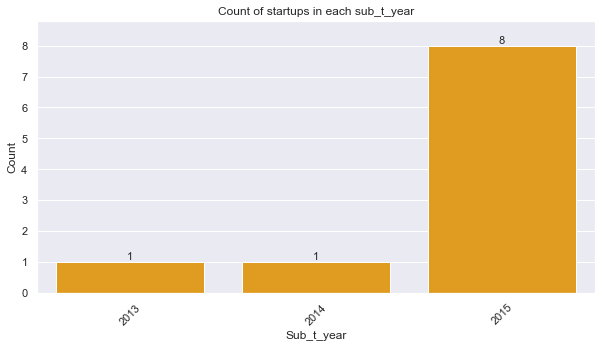

In [43]:
# Plot a bar chart to show the count of top-ten funded startups in each of the three years via call function 'cat_describe()'


sub_y_startups = startups[(startups['year_l_funding'] == '2015') | (startups['year_l_funding'] == '2014') | (startups['year_l_funding'] == '2013')]
sub_t_y_startups = sub_y_startups.iloc[:10, :]
sub_t_year = sub_t_y_startups.year_l_funding
cat_describe(sub_t_year)


sub_g_year: [('2014', 2), ('2015', 8)]



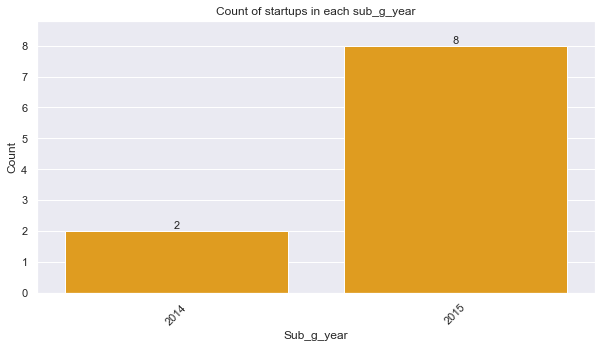

In [44]:
# Plot a bar chart to show the count of startups having top-ten growth score in each of the three years via call function 'cat_describe()'

sort_g_sub_y_startups = sub_y_startups.sort_values(by = ['growth_score'], ascending = False)
subg_sort_g_sub_y_startups = sort_g_sub_y_startups.iloc[:10, :]
sub_g_year = subg_sort_g_sub_y_startups.year_l_funding
cat_describe(sub_g_year)

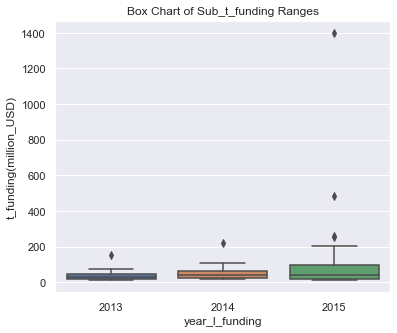

In [45]:
# Plot a box chart of total fundings range in each of these three years via call function 'boxchart()'

sub_t_funding = sub_y_startups.loc[:,'t_funding(million_USD)']
sub_year_l_funding = sub_y_startups.loc[:,'year_l_funding']
boxchart(sub_t_funding,sub_year_l_funding ) 

#### 4. Total Startup Count by Location and Funding Stage

In [46]:
bay_area_a = startups[(startups['funding_stage'] == 'A') & (startups['bay_area'] == 'Bay Area')]
bay_area_b = startups[(startups['funding_stage'] == 'B') & (startups['bay_area'] == 'Bay Area')]
bay_area_c = startups[(startups['funding_stage'] == 'C') & (startups['bay_area'] == 'Bay Area')]
bay_area_late = startups[(startups['funding_stage'] == 'Late') & (startups['bay_area'] == 'Bay Area')]
non_bay_area_a = startups[(startups['funding_stage'] == 'A') & (startups['bay_area'] == 'Outside the Bay Area')]
non_bay_area_b = startups[(startups['funding_stage'] == 'B') & (startups['bay_area'] == 'Outside the Bay Area')]
non_bay_area_c = startups[(startups['funding_stage'] == 'C') & (startups['bay_area'] == 'Outside the Bay Area')]
non_bay_area_late = startups[(startups['funding_stage'] == 'Late') & (startups['bay_area'] == 'Outside the Bay Area')]

In [47]:
bay_area_a_count = bay_area_a['name'].count()
bay_area_b_count = bay_area_b['name'].count()
bay_area_c_count = bay_area_c['name'].count()
bay_area_late_count = bay_area_late['name'].count()
non_bay_area_a_count = non_bay_area_a['name'].count()
non_bay_area_b_count = non_bay_area_b['name'].count()
non_bay_area_c_count = non_bay_area_c['name'].count()
non_bay_area_late_count = non_bay_area_late['name'].count()

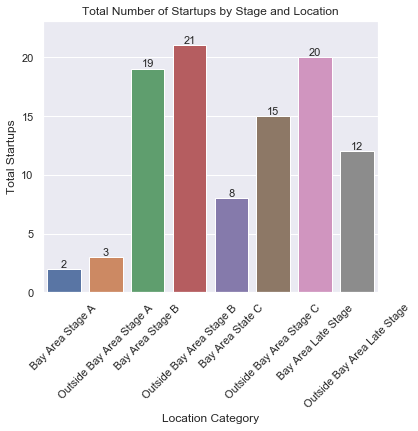

In [48]:
print()
categories  = ['Bay Area Stage A','Outside Bay Area Stage A','Bay Area Stage B','Outside Bay Area Stage B','Bay Area State C','Outside Bay Area Stage C','Bay Area Late Stage','Outside Bay Area Late Stage']

total_startups = [bay_area_a_count,non_bay_area_a_count,bay_area_b_count,non_bay_area_b_count,bay_area_c_count,non_bay_area_c_count,bay_area_late_count,non_bay_area_late_count]

toppers  = [f'{total_startups[0]}',f'{total_startups[1]}',f'{total_startups[2]}',f'{total_startups[3]}',f'{total_startups[4]}',f'{total_startups[5]}',f'{total_startups[6]}',f'{total_startups[7]}']

show_bar_chart('Total Number of Startups by Stage and Location','Location Category', 'Total Startups',categories, total_startups, toppers)
print()